In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Datasets/Carsnew2.csv",header=None, sep=None)

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_9547/152885511.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("Datasets/Carsnew2.csv",header=None, sep=None)


In [3]:
new_column_names = df.iloc[0]
df = df[1:]  # Skip the first row
df.columns = new_column_names
df

,price_ru,CL10,carYear,hasRun,engineVolume,wheel_right,wheel_left,gear_rear,gear_forward,gear_full,...,transmission_auto,engine_disel,engine_injector,engine_carburator,body_kupe,body_sedan,body_universal,body_hatchback,condition_good,condition_bad
1,360000,3,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,400000,3,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,339000,3,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,351000,9,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
5,422300,2,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,30000,2,18,300000,1600,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
8655,80000,9,19,300000,1600,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
8656,60000,6,19,305000,1598,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
8657,80000,6,19,305000,1800,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [4]:
df.loc[df['condition_good'] == '1', 'condition_good'] = 'Good'
df.loc[df['condition_bad'] == '1', 'condition_bad'] = 'Bad'
df

,price_ru,CL10,carYear,hasRun,engineVolume,wheel_right,wheel_left,gear_rear,gear_forward,gear_full,...,transmission_auto,engine_disel,engine_injector,engine_carburator,body_kupe,body_sedan,body_universal,body_hatchback,condition_good,condition_bad
1,360000,3,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,1,0,0,Good,0
2,400000,3,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,1,0,0,Good,0
3,339000,3,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,1,0,0,Good,0
4,351000,9,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,0,0,1,Good,0
5,422300,2,0,0,1360,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,30000,2,18,300000,1600,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,Bad
8655,80000,9,19,300000,1600,0,1,0,1,0,...,0,0,1,0,0,0,0,1,Good,0
8656,60000,6,19,305000,1598,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,Bad
8657,80000,6,19,305000,1800,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,Bad


In [5]:
def merge_conditions(row):
    if row['condition_good'] == 'Good':
        return 'Good'
    elif row['condition_bad'] == 'Bad':
        return 'Bad'
    else:
        return 'Unknown'  # or any other default value if needed

# Create a new column 'condition' by applying the custom function to each row
df['condition'] = df.apply(merge_conditions, axis=1)

In [6]:
df.drop(columns=['condition_good', 'condition_bad'], inplace=True)

In [7]:
df

,price_ru,CL10,carYear,hasRun,engineVolume,wheel_right,wheel_left,gear_rear,gear_forward,gear_full,transmission_mech,transmission_auto,engine_disel,engine_injector,engine_carburator,body_kupe,body_sedan,body_universal,body_hatchback,condition
1,360000,3,0,0,1360,0,1,0,1,0,1,0,0,1,0,0,1,0,0,Good
2,400000,3,0,0,1360,0,1,0,1,0,1,0,0,1,0,0,1,0,0,Good
3,339000,3,0,0,1360,0,1,0,1,0,1,0,0,1,0,0,1,0,0,Good
4,351000,9,0,0,1360,0,1,0,1,0,1,0,0,1,0,0,0,0,1,Good
5,422300,2,0,0,1360,0,1,0,1,0,1,0,0,1,0,0,0,0,1,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,30000,2,18,300000,1600,0,1,0,1,0,1,0,0,1,0,0,1,0,0,Bad
8655,80000,9,19,300000,1600,0,1,0,1,0,1,0,0,1,0,0,0,0,1,Good
8656,60000,6,19,305000,1598,0,1,0,1,0,1,0,0,0,1,0,1,0,0,Bad
8657,80000,6,19,305000,1800,0,1,0,1,0,1,0,0,0,1,0,1,0,0,Bad


In [15]:
X = df.drop(columns='condition')
y = df['condition']

In [16]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
def show_crcm(y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    # Plot heatmap
    plt.imshow(cm, cmap='YlGnBu',interpolation='nearest')
    # Add annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

    plt.xticks(ticks=[0, 1], labels=['bad', 'good'])
    plt.yticks(ticks=[0, 1], labels=['bad', 'good'])
    # Add color bar
    plt.colorbar()
    # Show plot
    plt.show()
    print(cr)

In [18]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
accuracy :  0.9864270283345427


In [19]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [13]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.987


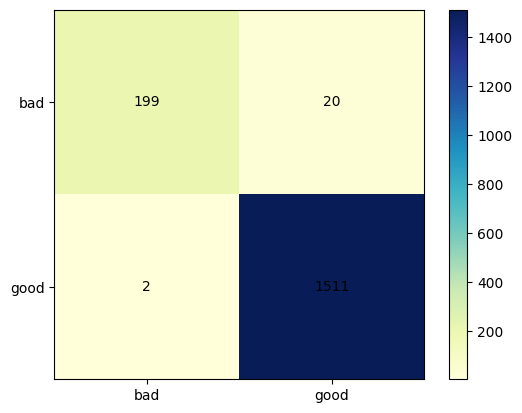

              precision    recall  f1-score
Bad            0.990050  0.908676  0.947619
Good           0.986937  0.998678  0.992773
accuracy       0.987298  0.987298  0.987298
macro avg      0.988493  0.953677  0.970196
weighted avg   0.987330  0.987298  0.987063


In [14]:
show_crcm(y_pred_tree)